&nbsp;

# 5. Regularization 
While training a machine learning model, the model can easily be overfitted or underfitted. 
To avoid this, we use regularization in machine learning to properly fit a model onto our test set. Overfitting occurs when the model learns too much detail and noise from the training data to the point when new data is exposed, the model will perform poorly on it. Regularization techniques help reduce the chance of overfitting by either adding penalties or stopping before the validation set's performance starts to decline. 

In [1]:
# Standard libraries. 
import pandas as pd
import numpy as np 
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Importing our functions. 
import functions
import visuals

# Importing chosen models. 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing transformers. 
from sklearn.decomposition import PCA

# Converts plotly output into static images, so it can be viewed inside github repository. 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() # Setting root directory as cwd. 
df = pd.read_csv(r"{}\train_new_features.csv".format(root)) # Importing the train set.
processed = pd.read_csv(r"{}\train_processed.csv".format(root))
df.set_index("Name", inplace=True)
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Martial Status,Survived
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,S,young adult,Not Married,0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,female,38.0,1,0,PC 17599,71.2833,C,middle aged,Married,1


&nbsp;

### Section A: Overfitting
This section will focus on analyzing whether our classifiers overfitted on the training data. We want to avoid overfitting because if a model familiarises itself with the training data, it also inheirts its noise which would result in any predictions on unseen data to perform poorly. 

**A.1: Logistic Regression**<br>
Let's check if our Logistic Regression Classifier overfitted.

In [3]:
# Splitting the data. 
X = processed.iloc[:,:-1]
y = processed.iloc[:,-1]

pca = PCA(n_components=20)
pcaLR = pca.fit_transform(X)

# Check if the model overfit. 
LR = functions.model_evaluation()
# Checking if our hypertuned models overfited. 
LR.overfitting_checker(pcaLR, y, LogisticRegression(max_iter=1000, C=1.0))

Model scored an Train_F1_Score of: 0.82 and a Validation_F1_Score of: 0.80


**A.2: Gradient Boosting Classifier**<br>
The next step is to check whether our Gradient Boosting Classifier overfitted or not. 

In [4]:
pca = PCA(n_components=17)
pcaGBC = pca.fit_transform(X)

# Check if the model overfit. 
GBC = functions.model_evaluation()
# Checking if our hypertuned models overfited. 
GBC.overfitting_checker(pcaGBC, y, GradientBoostingClassifier(learning_rate=0.1, max_depth=2, min_samples_split=30,
                                                             n_estimators=250))

Model scored an Train_F1_Score of: 0.93 and a Validation_F1_Score of: 0.82


**A.3: XGB Classifier**<br>
And finally, our XGB Classifier. 

In [5]:
pca = PCA(n_components=19)
pcaXGB = pca.fit_transform(X)

# Check if the model overfit. 
XGB = functions.model_evaluation()
# Checking if our hypertuned models overfited. 
XGB.overfitting_checker(pcaXGB, y, XGBClassifier(learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=500))

Model scored an Train_F1_Score of: 0.93 and a Validation_F1_Score of: 0.81


* Based on our overfitting function, the only classifier to not overfit was the Logistic Regression. 

| Model | Model Type | Train f1_score | Validation f1_score |
|---------|---------|---------|---------|
| **Logistic Regression** |  PCA Data | 82% |81% |
| **Gradient Boosting Classifier** |  PCA Data | 93% |82% |
| **XGB Classifier** |  PCA Data | 93% |81% |

&nbsp;

### Section B: Regularization
This section will focus on enabling regularization techniques for all our chosen models to counter overfitting. Regularization is the process of adding penalties or early stopping to prevent a model from overfitting to the training data.

**B.1: Regularizing Logistic Regression**<br>
To regualrize our Logistic Regression we'll set the "penalty" parameter to "elasticnet" which is a combination of L1 and L2 regularization. The l1_ratio will determine how much influence l1 will penalize our model. We will also set "solver" to 'saga', just because this is the only solver that is compatible with elasticnet.

In [6]:
# Check if the model overfit. 
LR = functions.model_evaluation()
# Checking if our hypertuned models overfited. 
LR.overfitting_checker(pcaLR, y, LogisticRegression(max_iter=5000, C=1.0, penalty='elasticnet', 
                                                    solver='saga', l1_ratio=0.90))

Model scored an Train_F1_Score of: 0.80 and a Validation_F1_Score of: 0.79


**B.2: Regularizing Gradient Boosting Classifier**<br>
To enable early stopping for our Gradient Boosting Classifier we include the "n_iter_no_change" (early stopping), "validation_fraction" (validation set %) and "tol" (tolerance level) parameters.

In [7]:
# Check if the model overfit. 
GBC = functions.model_evaluation()
# Checking if our hypertuned models overfited. 
GBC.overfitting_checker(pcaGBC, y, GradientBoostingClassifier(learning_rate=0.1, max_depth=2, min_samples_split=30,
                                                             n_estimators=250, validation_fraction=0.2,
                                                             n_iter_no_change=20, tol=2.5))

Model scored an Train_F1_Score of: 0.83 and a Validation_F1_Score of: 0.79


| Model | Model Type | Regularization Metrics | f1_score |
|---------|---------|---------|---------|
| **Logistic Regression** | PCA Data|penalty="elasticnet", solver="saga", l1_ratio=0.90 | 79% |
| **Gradient Boosting Classifier** | PCA Data | min_samples_split=10, max_depth=20 |77% |

**B.3: Regularizing XGB Classifier**<br>
To regularize our XGB Classifer we can implement the early stopping technique. This method involves the algorithm to stop training n number of epochs once the loss function of the validation set starts to deteroriate.

In [8]:
train_test = functions.Early_Stopping(pcaXGB, y, XGBClassifier(eval_metric=["logloss"], learning_rate=0.01, max_depth=20,
                                                               min_child_weight=5, n_estimators=500))

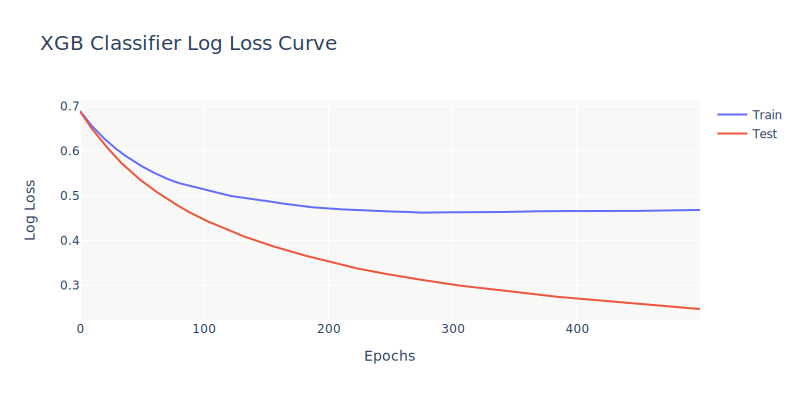

In [9]:
# Plotting the loss function for both the train and test sets over n number of epochs. 
visuals.LogLoss_Curve(train_test.x_axis, train_test.results["validation_1"]['logloss'], 
                        train_test.results["validation_0"]['logloss'])

In [10]:
test = functions.Early_Stopping(pcaXGB, y, XGBClassifier(early_stopping_rounds=10, eval_metric=["logloss"],learning_rate=0.01, 
                                               max_depth=20, min_child_weight=5, n_estimators=500))
print("f1_score: %.2f%%" % (test.f1*100))

f1_score: 74.44%


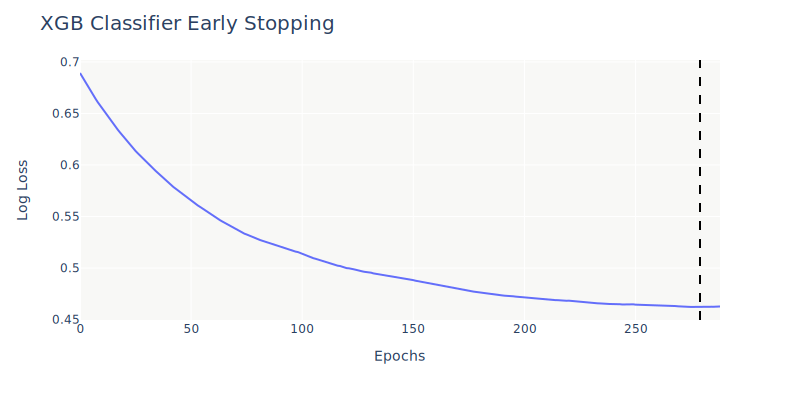

The model stopped training at around 290 epochs, with the best loss score observed at: 279.


In [11]:
# Plot early stopping results. 
fig = px.line(x=test.x_axis, y=test.results['validation_1']['logloss'])
fig.add_vline(x=test.clf.best_ntree_limit, line_width=2, line_dash="dash", line_color="black") # Best loss score. 
fig.update_layout(title='XGB Classifier Early Stopping',
                       xaxis_title='Epochs',
                       yaxis_title='Log Loss',
                       height=400, width=800, plot_bgcolor='#F8F8F6', title_font_size=20, title_font_family='Arial Black')
fig.show()

print("The model stopped training at around 290 epochs, with the best loss score observed at: %.0f." % (
    test.clf.best_ntree_limit))
# Now we know that we should set our number of trees (n_estimator) to =286 to avoid overfitting.

&nbsp;

### Section C: Threshold Manipulation
Threshold manipulation is the process of changing the default threshold value used to classify predictions into classes. We can create an array of threshold values and iterate through them to optimize for our weighted recall evaluation metric. 

Since algorithms are stochastic in nature we will run our expirement through 10 iterations and record the threshold that outputs the highest score. 

**C.1: Logistic Regression Optimal Threshold**<br>
Now it's time to explore some threshold values on our Logistic Regression Classifier.

Threshold=0.494, F-Score=0.79738


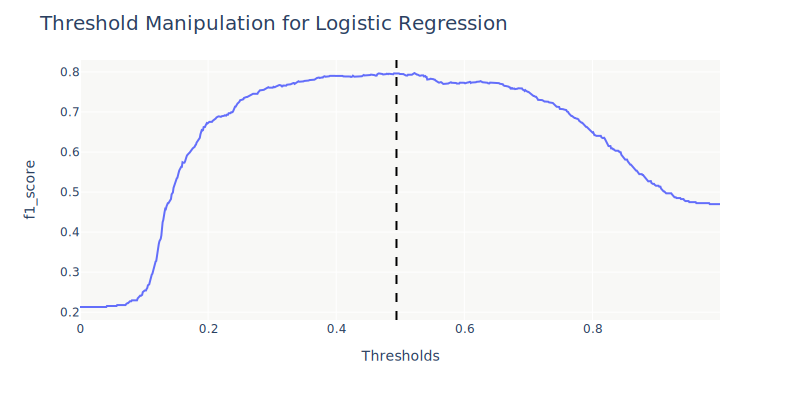

In [12]:
visuals.threshold_manipulation(pcaLR, y, LogisticRegression(max_iter=5000, C=1.0, penalty='elasticnet', 
                                                    solver='saga', l1_ratio=0.90), "Logistic Regression")

**C.2: Gradient Boosting Classifier Optimal Threshold**<br>
The next step is to repeat the process for our Gradient Boosting Classifier.

Threshold=0.435, F-Score=0.78970


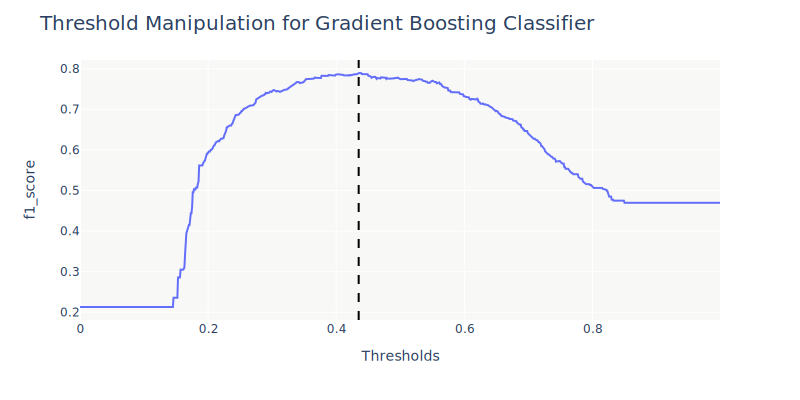

In [13]:
visuals.threshold_manipulation(pcaGBC, y, GradientBoostingClassifier(learning_rate=0.1, max_depth=2, min_samples_split=30,
                                                            n_estimators=250, n_iter_no_change=20, validation_fraction=0.2, 
                                                            tol=2.5), "Gradient Boosting Classifier")

**C.3: XGB Classifier Optimal Threshold**<br>
Finally, testing our threshold function on our XGB Classifier.

Threshold=0.518, F-Score=0.82122


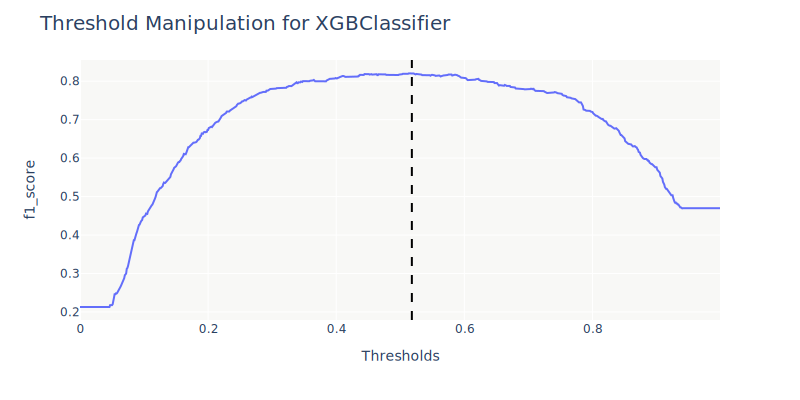

In [14]:
visuals.threshold_manipulation(pcaXGB, y, XGBClassifier(learning_rate=0.01, 
                                 max_depth=20, min_child_weight=5, n_estimators= test.clf.best_ntree_limit), 
                                 "XGBClassifier") # Remember to set n_estimators to 279 from early stopping. 

**C.4: Conclusion**<br>
To sum up, we successfully regularized our regressor models through early stopping and managed to soften the impact of overfitting, whilst still retaining our strong validation performance. With all our models regularized and fitted with the best combination of hyperparameters and thresholds it is now time to truely test our algorithms on the holdout dataset, that we put aside from the beginning of the project.

&nbsp;

| Model | Model Type | Regularized Hyperparameters |Threshold | 
|---------|---------|---------|---------|
| **Logistic Regression** | PCA Data   |max_iter=5000, C=1.0, penalty='elasticnet', solver='saga', l1_ratio=0.90 |  0.494   |
| **Gradient Boosting Classifier** | PCA Data |learning_rate=0.1, max_depth=2, min_samples_split=30, n_estimators=250, n_iter_no_change=20, <br>validation_fraction=0.2, tol=2.5 | 0.467   |
| **XGB Classifier** | PCA Data | learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=280 | 0.525   |

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  